In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [108]:
def hist_charter(data):
    
    w = 1/len(data) # weight
    X = dict()
    
    for i in data:
        
        try:
            X[i] = X[i] + w
        except:
            X[i] = w
        
    vals = np.array([key for key in X.keys()])
    weights = np.array([val for val in X.values()])
    return vals, weights
    

# Opgave 2.1

In [2]:
class Dice(object):
    
    def __init__(self):
        pass
    
    @staticmethod
    def outcome_space():
        return [i + 1 for i in range(6)]
    
class Coin(object):
    
    def __init__(self):
        pass

    @staticmethod
    def outcome_space():
        return[0, 1]

In [3]:
red = Dice()
white = Dice()

In [4]:
outcomes = []
for i in red.outcome_space():
    for j in white.outcome_space():
        outcomes.append((i,j))

In [5]:
def Y_var(red, white):
    
    return min(red, white)

def Z_var(red, white):
    
    return max(red, white)

# marginal fordeling af $Y$

In [6]:
Y_outcomes = []

for outcome in outcomes:
    result = Y_var(outcome[0],outcome[1])
    Y_outcomes.append(result)
    

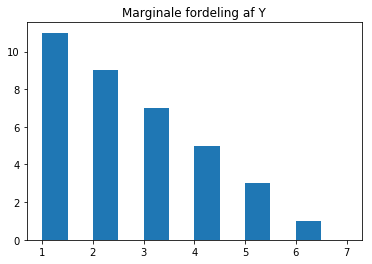

In [7]:
_bins = [i*0.5+1 for i in range(13)]

plt.hist(Y_outcomes, bins=_bins)
plt.title("Marginale fordeling af Y")

# Den marginale fordeling af Z

In [8]:
Z_outcomes = []

for outcome in outcomes:
    result = Z_var(outcome[0],outcome[1])
    Z_outcomes.append(result)
    

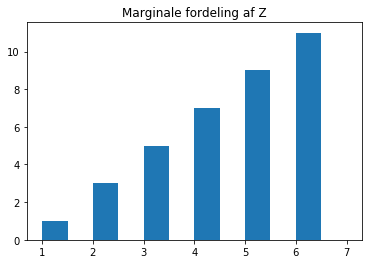

In [9]:
_bins = [i*0.5+ 1 for i in range(13)]

plt.hist(Z_outcomes, bins=_bins)
plt.title("Marginale fordeling af Z")

# Opgave 2.3

In [10]:
Y_vals = [0,1,1,2,2,3,3,4,4,5]
PY_vals = [0,0,0.4,0.4,0.7,0.7,0.9,0.9,1,1]

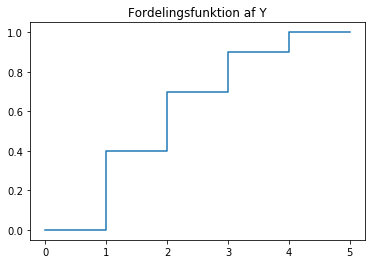

In [11]:
plt.plot(Y_vals, PY_vals)
plt.title("Fordelingsfunktion af Y")

# Opgave B.3

For nemhedsskyld kalder vi den første terning **red** og den anden **white**

In [12]:
red = Dice()
white = Dice()

In [13]:
outcomes = []
for i in red.outcome_space():
    for j in white.outcome_space():
        outcomes.append((i,j))

In [14]:
def Y(r, w):
    
    return r + w

def Z(r, w):
    
    return r - w

def W(r, w):
    
    return (r-w)**2

In [15]:
def tabulate_pdf(func, dice1, dice2):
    
    outcome_dict = dict()
    
    for i in dice1.outcome_space():
        for j in dice2.outcome_space():
            
            try:
                outcome_dict[i].append(func(i,j))
    
            except:
                outcome_dict[i] = []
                outcome_dict[i].append(func(i,j))
                
    dice2.outcome_space()
    return  pd.DataFrame(outcome_dict, index= dice2.outcome_space())

In [16]:
def tab_pdf_to_list(pdf, dice):
    
    outcomes = list()
    for i in dice.outcome_space():
        outcomes = outcomes + list(pdf[i])
        
    return outcomes

### simultan PDF (fordeling) samt CDF (fordelingsfunktion) for variabel Y

In [17]:
y_pdf = tabulate_pdf(Y, red, white)
y_pdf

,1,2,3,4,5,6
1,2,3,4,5,6,7
2,3,4,5,6,7,8
3,4,5,6,7,8,9
4,5,6,7,8,9,10
5,6,7,8,9,10,11
6,7,8,9,10,11,12


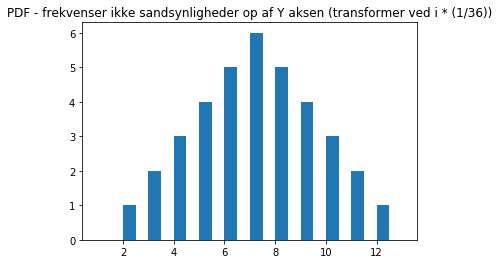

In [18]:
_bins = [i * 0.5 + 1 for i in range(25)]
plt.hist(tab_pdf_to_list(y_pdf, red),bins = _bins, normed=False, cumulative = False)
plt.title("PDF - frekvenser ikke sandsynligheder op af Y aksen (transformer ved i * (1/36))")

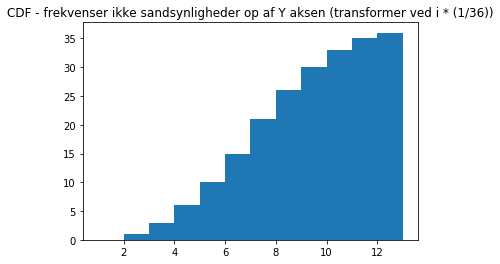

In [19]:
plt.hist(tab_pdf_to_list(y_pdf, red),bins = _bins, normed=False, cumulative = True)
plt.title("CDF - frekvenser ikke sandsynligheder op af Y aksen (transformer ved i * (1/36))")

### simultan PDF (fordeling) samt CDF (fordelingsfunktion) for variabel Z

In [20]:
z_pdf = tabulate_pdf(Z, red, white)
z_pdf

,1,2,3,4,5,6
1,0,1,2,3,4,5
2,-1,0,1,2,3,4
3,-2,-1,0,1,2,3
4,-3,-2,-1,0,1,2
5,-4,-3,-2,-1,0,1
6,-5,-4,-3,-2,-1,0


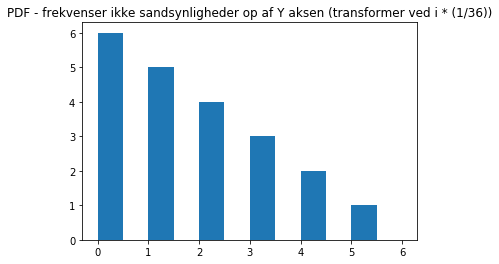

In [21]:
_bins = [i * 0.5 for i in range(13)]
plt.hist(tab_pdf_to_list(z_pdf, red),bins = _bins, normed=False)
plt.title("PDF - frekvenser ikke sandsynligheder op af Y aksen (transformer ved i * (1/36))")

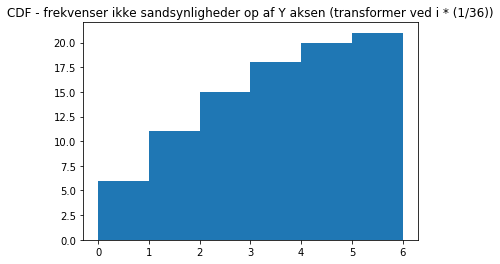

In [22]:
plt.hist(tab_pdf_to_list(z_pdf, red),bins = _bins, normed=False, cumulative = True)
plt.title("CDF - frekvenser ikke sandsynligheder op af Y aksen (transformer ved i * (1/36))")

### simultan PDF (fordeling) samt CDF (fordelingsfunktion) for variabel W

In [23]:
w_pdf = tabulate_pdf(W, red, white)
w_pdf

,1,2,3,4,5,6
1,0,1,4,9,16,25
2,1,0,1,4,9,16
3,4,1,0,1,4,9
4,9,4,1,0,1,4
5,16,9,4,1,0,1
6,25,16,9,4,1,0


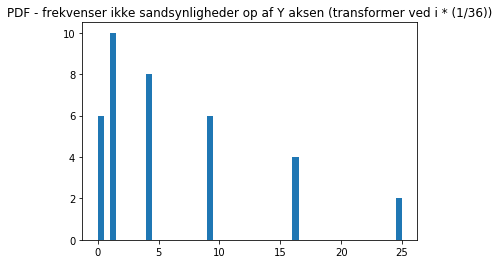

In [24]:
_bins = [i * 0.5 for i in range(51)]
plt.hist(tab_pdf_to_list(w_pdf, red),bins = _bins, normed=False)
plt.title("PDF - frekvenser ikke sandsynligheder op af Y aksen (transformer ved i * (1/36))")

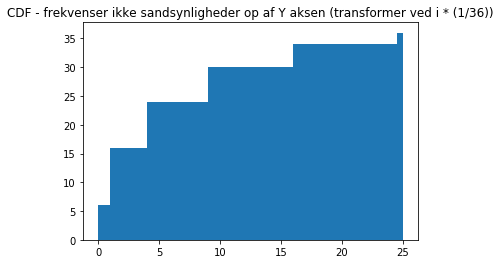

In [25]:
plt.hist(tab_pdf_to_list(w_pdf, red),bins = _bins, normed=False, cumulative = True)
plt.title("CDF - frekvenser ikke sandsynligheder op af Y aksen (transformer ved i * (1/36))")

# Opgave B.4

In [26]:
X_outcomes = []

for i in Dice().outcome_space():
    for j in Coin().outcome_space():
        X_outcomes.append(i + j)
        
        

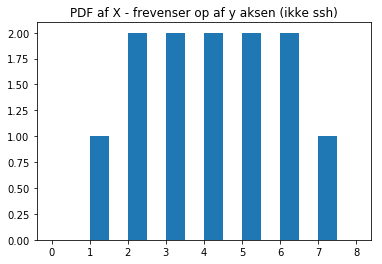

In [33]:
_bins = [i*0.5 for i in range(17)]
plt.hist(X_outcomes, bins = _bins)
plt.title('PDF af X - frevenser op af y aksen (ikke ssh)')

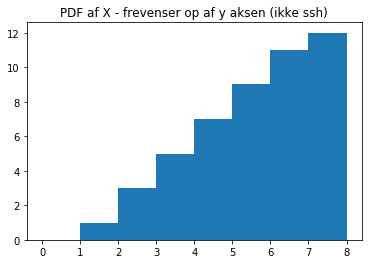

In [37]:
plt.hist(X_outcomes, bins = _bins, cumulative=True)
plt.title('PDF af X - frevenser op af y aksen (ikke ssh)')

# Opgave 2.4

In [122]:
X_outcomes = [1,2,3]
Y_outcomes = [1/x for x in X_outcomes]

In [110]:
vals, weights = hist_charter(X_outcomes)

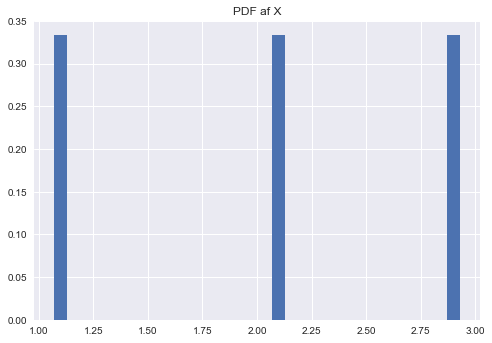

In [115]:
plt.hist(vals, weights=weights, rwidth = 0.3)
plt.title("PDF af X")

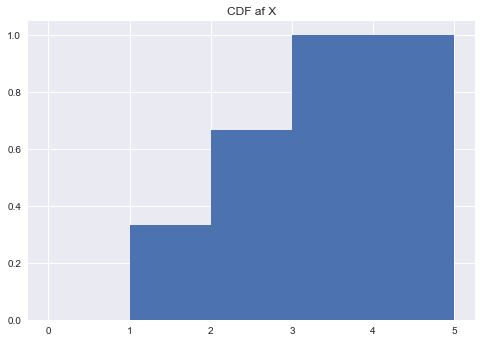

In [121]:
plt.hist(vals, weights = weights, cumulative =True, bins = [0,1,2,3,4,5])
plt.title("CDF af X")

In [123]:
vals, weights = hist_charter(Y_outcomes)

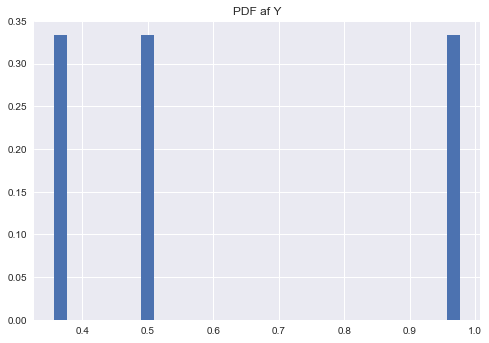

In [124]:
plt.hist(vals, weights=weights, rwidth = 0.3)
plt.title("PDF af Y")

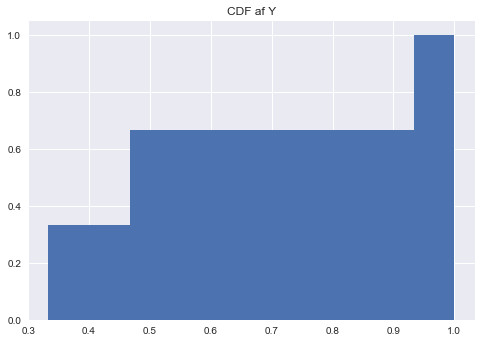

In [126]:
plt.hist(vals, weights = weights, cumulative =True,)
plt.title("CDF af Y")